### Importing all the necessary Pandas libraries

In [193]:
# Importing all the necessary libraries

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

### Reading the dataset 

In [194]:
# Dataset contains different types of food data (calories,fat,protein&fat) along with COVID 19 data by list of countries
# According to the datasource Food intake data is represented % of total intake amount

calories = pd.read_csv('Food_Supply_kcal_Data.csv')
protein = pd.read_csv('Protein_Supply_Quantity_Data.csv')
fat = pd.read_csv('Fat_Supply_Quantity_Data.csv')
qty = pd.read_csv('Food_Supply_Quantity_kg_Data.csv')

In [195]:
# Checking the dataset

nRow, nCol = calories.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 170 rows and 33 columns


In [196]:
# Checking sample dataset for any NaN values in the columns of interest

# calories.info()
calories.isna().sum()

Country                         0
Continent                       0
Alcoholic Beverages             0
Animal Products                 0
Animal fats                     0
Aquatic Products, Other         0
Cereals - Excluding Beer        0
Eggs                            0
Fish, Seafood                   0
Fruits - Excluding Wine         0
Meat                            0
Milk - Excluding Butter         0
Miscellaneous                   0
Offals                          0
Oilcrops                        0
Pulses                          0
Spices                          0
Starchy Roots                   0
Stimulants                      0
Sugar Crops                     0
Sugar & Sweeteners              0
Treenuts                        0
Vegetal Products                0
Vegetable Oils                  0
Vegetables                      0
Obesity                         3
Undernourished                  7
Confirmed                       6
Deaths                          6
Recovered     

In [197]:
# Dropping countries where 'Confirmed' COVID cases,'Undernourished' & 'Obesity' data is Not Available

calories.dropna(subset=['Confirmed','Undernourished','Obesity'],inplace=True)
protein.dropna(subset=['Confirmed','Undernourished','Obesity'],inplace=True)
fat.dropna(subset=['Confirmed','Undernourished','Obesity'],inplace=True)
qty.dropna(subset=['Confirmed','Undernourished','Obesity'],inplace=True)



In [198]:
#Checking for NaN values

calories.isna().sum()

Country                         0
Continent                       0
Alcoholic Beverages             0
Animal Products                 0
Animal fats                     0
Aquatic Products, Other         0
Cereals - Excluding Beer        0
Eggs                            0
Fish, Seafood                   0
Fruits - Excluding Wine         0
Meat                            0
Milk - Excluding Butter         0
Miscellaneous                   0
Offals                          0
Oilcrops                        0
Pulses                          0
Spices                          0
Starchy Roots                   0
Stimulants                      0
Sugar Crops                     0
Sugar & Sweeteners              0
Treenuts                        0
Vegetal Products                0
Vegetable Oils                  0
Vegetables                      0
Obesity                         0
Undernourished                  0
Confirmed                       0
Deaths                          0
Recovered     

In [126]:
# Aggregating by continents

# calories.groupby(['Continent']).mean()

In [154]:
# Least number of confirmed COVID cases as % of population
# calories[calories['Confirmed'] == calories['Confirmed'].min()]

In [49]:
# Most number of confirmed COVID cases as % of population
#calories[calories['Confirmed'] == calories['Confirmed'].max()] 

In [199]:
# Validating that Total of intake columns % values equal to 100.

total = qty.iloc[:, 2:25].sum(axis=1)
print(total)


0      100.0000
1      100.0000
2      100.0000
3      100.0000
5      100.0000
         ...   
165     99.9999
166    100.0001
167    100.0001
168    100.0002
169    100.0002
Length: 156, dtype: float64


In [130]:
# Undernourished column has floats and 'strings', which needs to be cleaned up before further processing
# Population column has absolute numbers, which needs to truncated for display purposes.
# Last column "Unit" has no purpose for analysis

# calories['Undernourished'].head(25) 

In [200]:
# Method to remove special character(s) and convert values to float

def to_float(x):
    if isinstance(x,str):
        return float(x.lstrip('<'))
    else:
        return x

In [202]:
# Method to convert population to millions 

def convert(x):
    x = round(x/1000000,2)
    return x

In [203]:
# Invoke to_float()method to convert column "Undernourished"

protein['Undernourished']= protein['Undernourished'].apply(to_float)
calories['Undernourished']= calories['Undernourished'].apply(to_float)
fat['Undernourished']= fat['Undernourished'].apply(to_float)
qty['Undernourished']= qty['Undernourished'].apply(to_float)


In [205]:
# Checking results of to_float methd

# qty['Undernourished'].head(25)

In [206]:
# Invoke convert() method to convert population to millions

protein['Population']= protein['Population'].apply(convert)
calories['Population']= calories['Population'].apply(convert)
fat['Population']= fat['Population'].apply(convert)
qty['Population']= qty['Population'].apply(convert)

In [207]:
calories.head(3)

,Country,Continent,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,Asia,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,...,2.3012,0.7504,4.5,29.8,0.138283,0.005970,0.116713,0.015601,38.93,%
1,Albania,Europe,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,...,2.8244,2.7508,22.3,6.2,2.347956,0.044574,1.396230,0.907153,2.84,%
2,Algeria,Africa,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,...,5.7638,2.0457,26.6,3.9,0.233066,0.006373,0.158234,0.068458,44.36,%


In [166]:
# Rename Population Column to add (million)

In [208]:
# calories.rename({'Population': 'Population (Million)'}, axis=1, inplace=True)
# protein.rename({'Population': 'Population (Million)'}, axis=1, inplace=True)
# fat.rename({'Population': 'Population (Million)'}, axis=1, inplace=True)
# qty.rename({'Population': 'Population (Million)'}, axis=1, inplace=True)

In [210]:
# calories.head(2)
qty.head(2)

,Country,Continent,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population (Million),Unit (all except Population)
0,Afghanistan,Asia,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,...,6.7642,40.5645,4.5,29.8,0.138283,0.005970,0.116713,0.015601,38.93,%
1,Albania,Europe,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,...,11.7753,31.2304,22.3,6.2,2.347956,0.044574,1.396230,0.907153,2.84,%


In [211]:
# Drop the last column

# protein.drop(columns=['Unit (all except Population)'],inplace = True)
# calories.drop(columns=['Unit (all except Population)'],inplace = True)
# fat.drop(columns=['Unit (all except Population)'],inplace = True)
# qty.drop(columns=['Unit (all except Population)'],inplace = True)

qty.head(3)


,Country,Continent,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,...,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population (Million)
0,Afghanistan,Asia,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,...,0.5345,6.7642,40.5645,4.5,29.8,0.138283,0.005970,0.116713,0.015601,38.93
1,Albania,Europe,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,...,0.3261,11.7753,31.2304,22.3,6.2,2.347956,0.044574,1.396230,0.907153,2.84
2,Algeria,Africa,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,...,1.0310,11.6484,40.3651,26.6,3.9,0.233066,0.006373,0.158234,0.068458,44.36


### Categorizing intake source columns into food groups

In [244]:
# qty['Meat Products'] = qty.iloc[:,[3,4,10,13]].sum(axis=1)
# qty['Aquatic & Seafood'] = qty.iloc[:,[5,8]].sum(axis=1) 
# qty['Plant Products'] = qty.iloc[:,[6,9,14,15,16,17,21,22,23,24]].sum(axis=1)
# qty['Sugars'] = qty.iloc[:,[19,20]].sum(axis=1)

# calories['Meat Products'] = calories.iloc[:,[3,4,10,13]].sum(axis=1)
# calories['Aquatic & Seafood'] = calories.iloc[:,[5,8]].sum(axis=1) 
# calories['Plant Products'] = calories.iloc[:,[6,9,14,15,16,17,21,22,23,24]].sum(axis=1)
# calories['Sugars'] = calories.iloc[:,[19,20]].sum(axis=1)

# protein['Meat Products'] = protein.iloc[:,[3,4,10,12]].sum(axis=1)
# protein['Aquatic & Seafood'] = protein.iloc[:,[5,8]].sum(axis=1) 
# protein['Plant Products'] = protein.iloc[:,[6,9,13,14,15,16,20,21,22,23]].sum(axis=1)
# protein['Sugars'] = protein.iloc[:,[18,19]].sum(axis=1)

# fat['Meat Products'] = fat.iloc[:,[3,4,10,13]].sum(axis=1)
# fat['Aquatic & Seafood'] = fat.iloc[:,[5,8]].sum(axis=1) 
# fat['Plant Products'] = fat.iloc[:,[6,9,14,15,16,17,21,22,23,24]].sum(axis=1)
# fat['Sugars'] = fat.iloc[:,[19,20]].sum(axis=1)


In [258]:
fat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 169
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   156 non-null    object 
 1   Continent                 156 non-null    object 
 2   Alcoholic Beverages       156 non-null    float64
 3   Animal Products           156 non-null    float64
 4   Animal fats               156 non-null    float64
 5   Aquatic Products, Other   156 non-null    float64
 6   Cereals - Excluding Beer  156 non-null    float64
 7   Eggs                      156 non-null    float64
 8   Fish, Seafood             156 non-null    float64
 9   Fruits - Excluding Wine   156 non-null    float64
 10  Meat                      156 non-null    float64
 11  Miscellaneous             156 non-null    float64
 12  Milk - Excluding Butter   156 non-null    float64
 13  Offals                    156 non-null    float64
 14  Oilcrops  

### Removing individual columns that have been grouped into categories

In [259]:
## Dropping individual columns of grouped categories

# cols = [3,4,5,6,8,9,10,13,14,15,16,17,19,20,21,22,23,24]
# qty.drop(qty.columns[cols],axis=1,inplace=True)

# cols = [3,4,5,6,8,9,10,13,14,15,16,17,19,20,21,22,23,24]
# calories.drop(calories.columns[cols],axis=1,inplace=True)

# cols = [3,4,5,6,8,9,10,12,13,14,15,16,18,19,20,21,22,23]
# protein.drop(protein.columns[cols],axis=1,inplace=True)

# cols = [3,4,5,6,8,9,10,13,14,15,16,17,19,20,21,22,23,24]
# fat.drop(fat.columns[cols],axis=1,inplace=True)


In [262]:
# fat.head(2)

### Correlation between Obesity & COVID mortality rates

In [264]:
obesity = protein[['Obesity', 'Deaths']]
obesity

,Obesity,Deaths
0,4.5,0.005970
1,22.3,0.044574
2,26.6,0.006373
3,6.8,0.001316
5,28.5,0.099669
...,...,...
165,25.2,0.003823
166,2.1,0.000036
167,14.1,0.002052
168,6.5,0.002867


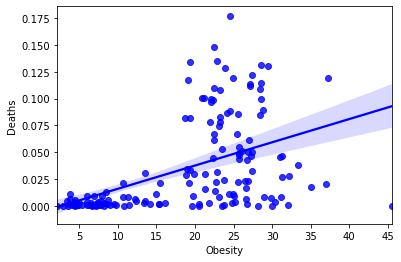

In [266]:
# Scatter plot showing correlation between Obesity & death rates

sns.regplot(x='Obesity', y='Deaths', color="blue", data=obesity);

Data indicates positive correlation between obesity rate and COVID deaths

### Impact of Food Intake sources on COVID mortality rates

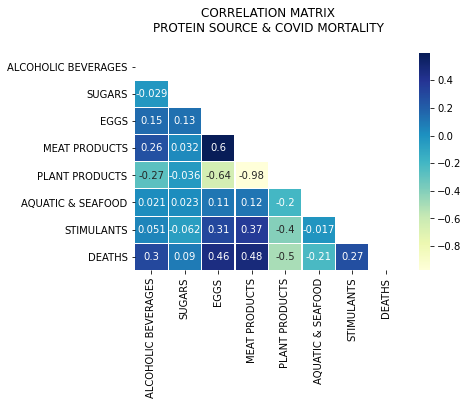

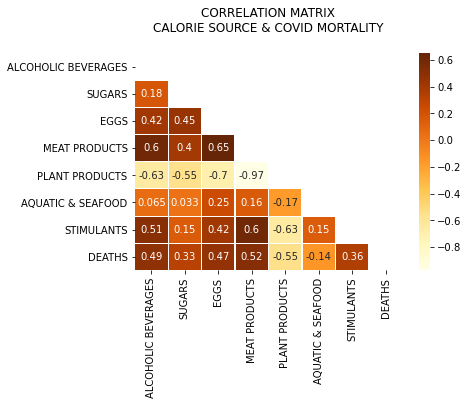

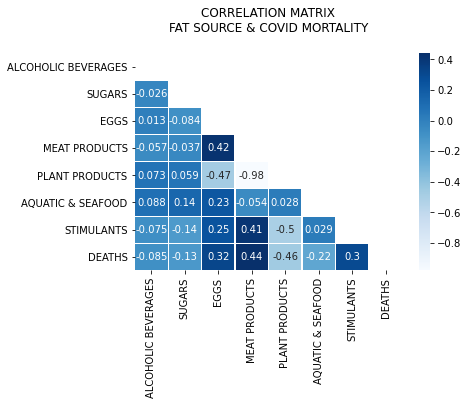

In [285]:
# Correlation Matrix between Protein intake sources & COVID Deaths

compare1 = ['Alcoholic Beverages','Sugars','Eggs','Meat Products','Plant Products','Aquatic & Seafood','Stimulants','Deaths']
df = protein[compare1]
corr1 = df.corr()
mask1 = np.triu(np.ones_like(corr1, dtype=np.bool))

# Using seaborn heatmap() method to plot the Matrix
# Color Options: "Blues", "YlOrBr", 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r
# 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr

sns.heatmap(corr1, mask=mask1, annot=True, cmap="YlGnBu", linewidths=.1)

# Labels
yticks = [i.upper() for i in corr1.index]
xticks = [i.upper() for i in corr1.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)

# Title
title = 'CORRELATION MATRIX\nPROTEIN SOURCE & COVID MORTALITY\n'
plt.title(title, loc='center', fontsize=12)
plt.show()

#####

# Correlation Matrix between Calorie intake sources & COVID Deaths

compare2 = ['Alcoholic Beverages','Sugars','Eggs','Meat Products','Plant Products','Aquatic & Seafood','Stimulants','Deaths']
df2 = calories[compare2]
corr2 = df2.corr()
mask2 = np.triu(np.ones_like(corr2, dtype=np.bool))

# Using seaborn heatmap() method to plot the Matrix
# Color options 'YlOrBr', "YlGnBu"

sns.heatmap(corr2, mask=mask2, annot=True, cmap="YlOrBr", linewidths=.1)

# Labels
yticks = [i.upper() for i in corr2.index]
xticks = [i.upper() for i in corr2.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)

# Title
title = 'CORRELATION MATRIX\nCALORIE SOURCE & COVID MORTALITY\n'
plt.title(title, loc='center', fontsize=12)
plt.show()



# Correlation Matrix between Fat intake sources & COVID Deaths

compare3 = ['Alcoholic Beverages','Sugars','Eggs','Meat Products','Plant Products','Aquatic & Seafood','Stimulants','Deaths']
df3 = fat[compare3]
corr3 = df3.corr()
mask3 = np.triu(np.ones_like(corr3, dtype=np.bool))

# Using seaborn heatmap() method to plot the Matrix
# Color Options: "Blues", "YlOrBr", 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r
# 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r'

sns.heatmap(corr3, mask=mask3, annot=True, cmap="Blues", linewidths=.1)

# Labels
yticks = [i.upper() for i in corr3.index]
xticks = [i.upper() for i in corr3.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)

# Title
title = 'CORRELATION MATRIX\nFAT SOURCE & COVID MORTALITY\n'
plt.title(title, loc='center', fontsize=12)
plt.show()




- Data shows stronger correlation between Calories & Protein intake from Alcoholic beverages, Meat Products, Eggs and higher COVID mortality rate
- Negative correlation between Plants/Aquatic sources & COVID deaths
- Key takeaways - EAT YOUR VEGGIES & DRINK IN MODERATION


#### Kernel Density Estimation (KDE)

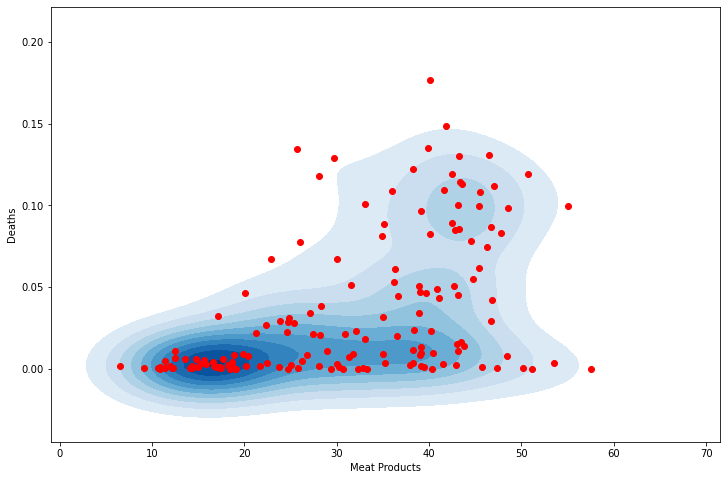

In [275]:
fig, ax = plt.subplots(1, figsize=(12,8))
sns.kdeplot(df['Meat Products'], df['Deaths'], cmap='Blues', shade=True, shade_lowest=False, clip=(-1,300))
plt.scatter(df['Meat Products'], df['Deaths'], color='red')
plt.show()

        Heatmap showing data clustering (protein from meat products vs COVID death rate)


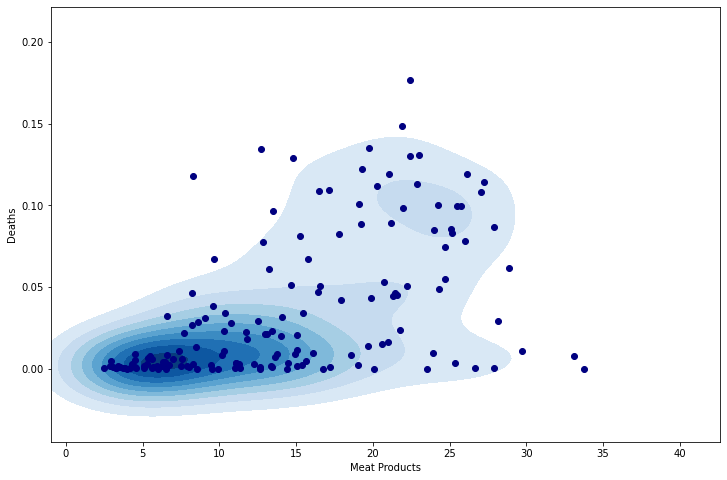

In [286]:
fig, ax = plt.subplots(1, figsize=(12,8))
sns.kdeplot(df2['Meat Products'], df2['Deaths'], cmap='Blues', shade=True, shade_lowest=False, clip=(-1,300))
plt.scatter(df2['Meat Products'], df2['Deaths'], color='navy')
plt.show()

       Heatmap showing data clustering (calories from meat products vs COVID death rate)